In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Оглянемо наші дані

In [2]:
df = pd.read_csv("./data.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB
None


Маємо 2043 строки та 9 колонок з різними типами даних

Немає пустих ячейок, що покращує нам роботу

In [3]:
df.head(15)

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667
5,0,0,2,1,60,1,3,True,82.000000
6,0,0,2,1,60,1,4,False,154.250000
7,0,0,2,1,60,2,0,True,80.950000
8,0,0,2,1,60,2,3,True,78.000000
9,0,0,2,1,60,2,4,False,197.010000


In [4]:
df.describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,10876.638889
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,44130.520833


Можемо бачити, що третій бідер робив ставки на більшу кількість продуктів ніж інші. 

Четвертий - найменшу.

Ціни від 59 до 90, що добре для аналізу. З першого погляду немає явних аутлаєрів.

(array([ 83., 119.,   0.,  68.,  68.,   0.,  68.,   0.,  68.,  68.,   0.,
         68.,  68.,   0.,  68.,   0., 105., 221.,   0.,  62.,  62.,   0.,
         62.,   0.,  62.,  62.,   0.,  62.,   0.,  62.,  62.,   0.,  62.,
        221.,   0.,  14.,   0.,  14.,  14.,   0.,  14.,  14.,   0.,  14.,
          0.,  14.,  14.,   0.,  14.,  66.]),
 array([59.  , 59.62, 60.24, 60.86, 61.48, 62.1 , 62.72, 63.34, 63.96,
        64.58, 65.2 , 65.82, 66.44, 67.06, 67.68, 68.3 , 68.92, 69.54,
        70.16, 70.78, 71.4 , 72.02, 72.64, 73.26, 73.88, 74.5 , 75.12,
        75.74, 76.36, 76.98, 77.6 , 78.22, 78.84, 79.46, 80.08, 80.7 ,
        81.32, 81.94, 82.56, 83.18, 83.8 , 84.42, 85.04, 85.66, 86.28,
        86.9 , 87.52, 88.14, 88.76, 89.38, 90.  ]),
 <BarContainer object of 50 artists>)

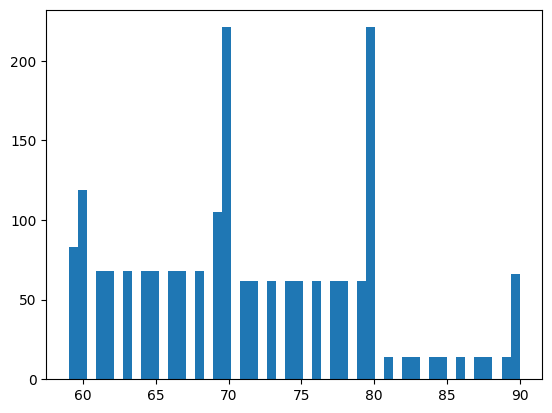

In [5]:
plt.hist(df["property.price"], bins=50)

In [6]:
print(df["property.price"].value_counts(sort=True))

property.price
70    221
80    221
60    119
69    105
59     83
61     68
62     68
63     68
64     68
65     68
66     68
67     68
68     68
90     66
73     62
78     62
74     62
71     62
79     62
75     62
77     62
76     62
72     62
81     14
83     14
84     14
85     14
86     14
87     14
88     14
89     14
82     14
Name: count, dtype: int64


З більш детального огляду можемо бачити, що ціни 80 та 70 зустрічаються начастіше. 

Інші ціни зустрічаються в межах 60 раз.

Найменше зустрічаються ціни 81-89

(array([788., 399.,  16.,  87.,  39.,   3.,  14.,  10.,  44.,  87.,  19.,
         21.,  21.,  25.,  23.,  17.,  17.,  22.,  16.,  24.,  26.,  18.,
         18.,  10.,  13.,  11.,   9.,  13.,  16.,  12.,  20.,  17.,  21.,
         23.,  11.,  18.,  17.,  17.,  14.,  12.,  11.,   4.,   7.,   3.,
          2.,   3.,   1.,   1.,   1.,   2.]),
 array([   77.91666667,   958.96875   ,  1840.02083333,  2721.07291667,
         3602.125     ,  4483.17708333,  5364.22916667,  6245.28125   ,
         7126.33333333,  8007.38541667,  8888.4375    ,  9769.48958333,
        10650.54166667, 11531.59375   , 12412.64583333, 13293.69791667,
        14174.75      , 15055.80208333, 15936.85416667, 16817.90625   ,
        17698.95833333, 18580.01041667, 19461.0625    , 20342.11458333,
        21223.16666667, 22104.21875   , 22985.27083333, 23866.32291667,
        24747.375     , 25628.42708333, 26509.47916667, 27390.53125   ,
        28271.58333333, 29152.63541667, 30033.6875    , 30914.73958333,
        31

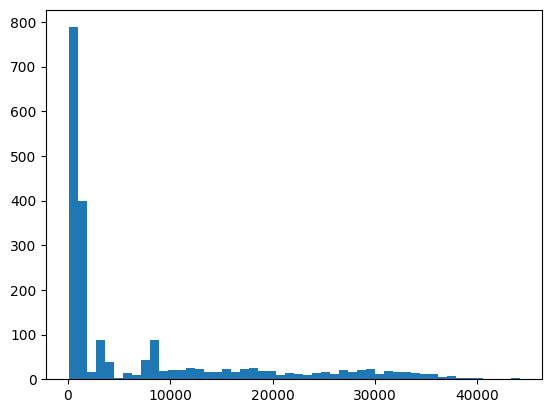

In [7]:
plt.hist(df["verification.time"], bins=50)

Час який потрібен на верифікацію, майже завжди незначний

# Давайте створимо наші Х та у

Розділемо їх на тренувальні та тестові частки

Протестуємо три різні моделі на них

In [48]:
X = df[['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
       'process.b4.capacity', 'property.price', 'property.product',
       'property.winner', 'verification.time']]
y = df["verification.result"]

scaler = StandardScaler()
scaler.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [50]:
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)),
      ('dt', DecisionTreeClassifier(random_state=42)))
    ]

stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train).score(X_test, y_test)

0.9975550122249389

In [36]:
boosting = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9975550122249389

In [46]:
bagging = BaggingClassifier(n_estimators=10, random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9975550122249389

Як бачимо, на даному датасеті класифікацію найкраще виконує Стекінг класифікатор та Бегінг.

Поексперементуємо з гіперпараметрами Бустінгу, щоб отримати кращі результати.

In [44]:
boosting = GradientBoostingClassifier(n_estimators=30, learning_rate=1, max_depth=5, random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9975550122249389

Збільшивши кількість естіматорів у три рази та максимальну глибину в 5, ми досягли результатів у майже 100%

In [51]:
def final_result(x, y):
    for model in [stacking, boosting, bagging]:
        model.fit(X_train, y_train)
        print(f"{model}\n model gives us {model.score(x, y)}")
        
final_result(X_val, y_val)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]),
                                ('dt',
                                 DecisionTreeClassifier(random_state=42)))],
                   final_estimator=LogisticRegression())
 model gives us 0.9951100244498777
GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=30,
                           random_state=42)
 model gives us 0.9975550122249389
BaggingClassifier(random_state=42)
 model gives us 0.9975550122249389


# Результати

Трохи корегуючи гіпер параметри цих трьох моделей, можемо досягти результатів у ~99.5%, що є дуже гарним показником

Однак на валідаційних даних ми бачимо різницю між результами.

Найкраще впоралась модель Бустінгу та Бегінгу з 99.7% потім - Стакінг з 99.5%.